In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
import scipy as sc
from scipy.spatial import Delaunay
from scipy.spatial.distance import cdist
import random

import pickle

from simplicial_kuramoto import SimplicialComplex
from simplicial_kuramoto.graph_generator import modular_graph
from simplicial_kuramoto.integrators import *
from simplicial_kuramoto.plotting import *

from simplicial_kuramoto.frustration_scan import *
from simplicial_kuramoto.sub_space_projections import *

In [2]:
def get_delauney_holes_multi(n_points, centre_holes,radius,points=None):


    if points is None:
        x = np.random.rand(n_points)
        y = np.random.rand(n_points)
        points = np.vstack([x,y]).T

    tri = Delaunay(points)

    edge_list = []
    
    
    idx_inside=np.empty([0], dtype=int)
    for i in range(centre_holes.shape[0]):
        idx_inside=np.hstack([idx_inside,encloses([centre_holes[i]],points,radius)[1]])
    
    for t in tri.simplices:
        
        if t[0] not in idx_inside and t[1] not in idx_inside:
            edge_list.append([t[0], t[1]])
     
        if t[1] not in idx_inside and t[2] not in idx_inside:
            edge_list.append([t[1], t[2]])

        if t[0] not in idx_inside and t[2] not in idx_inside:
            edge_list.append([t[0], t[2]])   


            
    graph = nx.Graph()
    #graph.add_nodes_from(np.arange(len(points)))    
    graph.add_edges_from(edge_list)
    
    Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
    g = graph.subgraph(Gcc[0])
    
    
    return g, points


def encloses(centre, points, radius):
    inside_hole = (cdist(centre, points, 'euclidean') <= radius)
    idx_inside = np.where(inside_hole )
    
    return idx_inside


# Plotting the nullspace of L1

def Null_Space_Plot(graph):
    complex_delaunay = SimplicialComplex(graph=graph, no_faces=False)


    KerL1=sc.linalg.null_space(complex_delaunay.L1.todense())

    for i in range(KerL1.shape[1]):
        plt.figure()
        nx.draw_networkx_nodes(graph, pos=points, node_size=5)
        nx.draw_networkx_edges(
                graph,
                pos=points,
                edge_color=KerL1[:,i],
                edge_cmap=plt.get_cmap("bwr"),
                width=5,
                edge_vmin=np.min(KerL1[:,i]),
                edge_vmax=np.max(KerL1[:,i]),
            )
        plt.title('Null space of L1, vector '+str(i))
        plt.show()

In [ ]:
def is_in_subspace(vector,matrix):
    ns=sc.linalg.null_space(matrix.todense())
    
    coeff=vector.dot(ns)
    ns_dim=coeff.shape
    
    vector_hat=np.zeros(ns.shape[0])

    for i in range(ns.shape[1]):
        vector_hat+=coeff[i]*ns[:,i]
    
    error=np.sum(np.abs(vector-vector_hat))
    
    return error, vector_hat, coeff, ns_dim

# One holes

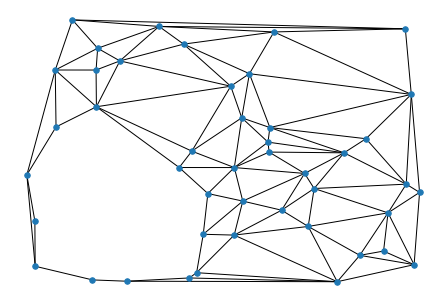

In [28]:
np.random.seed(4444)

centre_hole_1 = np.array([[0.25,0.25]])
# centre_hole_2 = np.array([[0.75,0.75]])

# centre_holes=np.concatenate((centre_hole_1,centre_hole_2),axis=0)

radius = 0.2

graph, points = get_delauney_holes_multi(50,centre_hole_1,radius)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

Gsc = SimplicialComplex(graph=graph, no_faces=False)

In [29]:
alpha1 = np.linspace(0,np.pi, 5)
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1

scan_frustration_parameters(
        Gsc,
        filename="Delaunay_one_hole.pkl",
        alpha1=alpha1,
        alpha2=alpha2,
        repeats=n_repeats,
        n_workers=2,
    )

  2%|▏         | 2/100 [00:26<21:27, 13.14s/it]Process ForkPoolWorker-6:
Process ForkPoolWorker-5:



KeyboardInterrupt: 

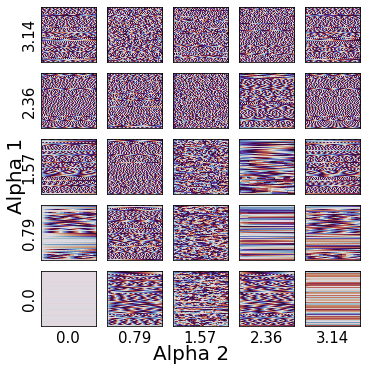

In [30]:
folder = "./results/"

path = folder + "Delaunay_one_hole.pkl"
filename = "Delaunay_one_hole_phases.pdf"
plot_phases(path, filename)

Number of holes: 1
Max number of dimensions: 104


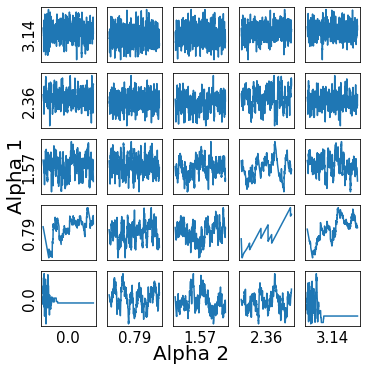

In [31]:
filename = "Delaunay_one_hole_harm.pdf"

plot_harm(path,filename)

Dimension of the gradient space: 41
Max number of dimensions: 104


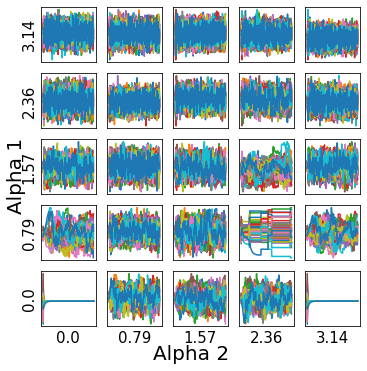

In [32]:
filename = "Delaunay_one_hole_grad.pdf"

plot_grad(path,filename)

Dimension of the curl space: 62
Max number of dimensions: 104


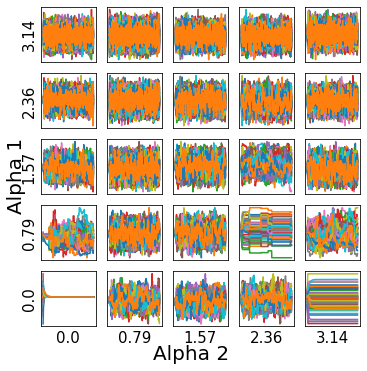

In [33]:
filename = "Delaunay_one_hole_curl.pdf"

plot_curl(path,filename)

## Two holes

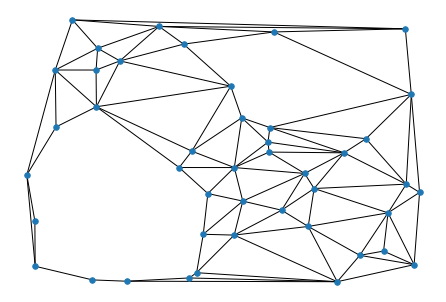

In [27]:
centre_hole_1 = np.array([[0.25,0.25]])
centre_hole_2 = np.array([[0.75,0.75]])

centre_holes=np.concatenate((centre_hole_1,centre_hole_2),axis=0)

radius = 0.2

graph, points = get_delauney_holes_multi(50,centre_holes,radius,points)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

Gsc = SimplicialComplex(graph=graph, no_faces=False)

In [34]:
alpha1 = np.linspace(0,np.pi, 5)
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1

scan_frustration_parameters(
        Gsc,
        filename="Delaunay_two_holes.pkl",
        alpha1=alpha1,
        alpha2=alpha2,
        repeats=n_repeats,
        n_workers=2,
    )

100%|██████████| 25/25 [12:05<00:00, 29.01s/it]


[[  message: 'The solver successfully reached the end of the integration interval.'
       nfev: 817
       njev: 2
        nlu: 59
        sol: None
     status: 0
    success: True
          t: array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
           0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
           0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
           1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
           1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
           2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
           2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
           2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
           3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
           3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
           4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
           4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
           4.8048048 ,   4

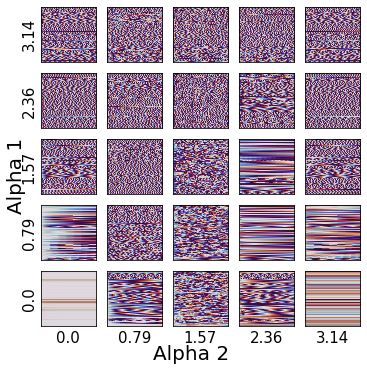

In [35]:
folder = "./results/"

path = folder + "Delaunay_two_holes.pkl"
filename = "Delaunay_two_holes_phases.pdf"
plot_phases(path, filename)

Number of holes: 1
Max number of dimensions: 112


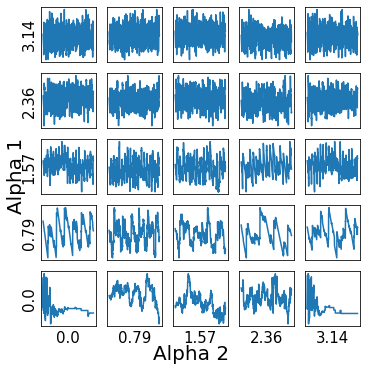

In [36]:
filename = "Delaunay_two_holes_harm.pdf"
plot_harm(path, filename)

Dimension of the gradient space: 44
Max number of dimensions: 112


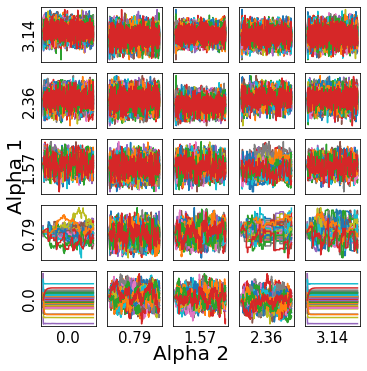

In [37]:
filename = "Delaunay_two_holes_grad.pdf"
plot_grad(path, filename)

Dimension of the curl space: 67
Max number of dimensions: 112


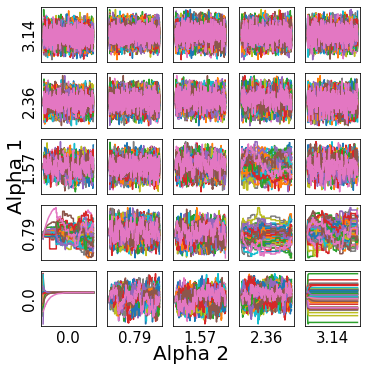

In [38]:
filename = "Delaunay_two_holes_curl.pdf"
plot_curl(path, filename)

In [39]:
Gsc, results, alpha1, alpha2 = pickle.load(open(path, "rb"))

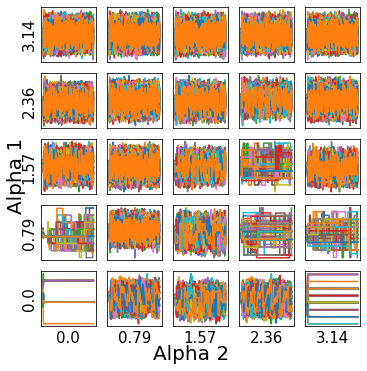

In [40]:
fig, axs = plt.subplots(len(alpha1), len(alpha2), figsize=(len(alpha2), len(alpha1)))
axs = np.flip(axs, axis=0)
for i, (idx_a1, idx_a2) in enumerate(itertools.product(range(len(alpha1)), range(len(alpha2)))):
    plt.sca(axs[idx_a1, idx_a2])
    result = mod(results[i][0].y)
    plt.plot(result.T.dot(Gsc.L1.todense()))
    plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

for idx_a1 in range(len(alpha1)):
    axs[idx_a1, 0].set_ylabel(f"{np.round(alpha1[idx_a1], 2)}", fontsize=15)
for idx_a2 in range(len(alpha2)):
    axs[0, idx_a2].set_xlabel(f"{np.round(alpha2[idx_a2], 2)}", fontsize=15)

fig.text(-0.01, 0.5, "Alpha 1", va="center", rotation="vertical", fontsize=20)
fig.text(0.5, -0.01, "Alpha 2", ha="center", fontsize=20)
fig.tight_layout()

## Three holes

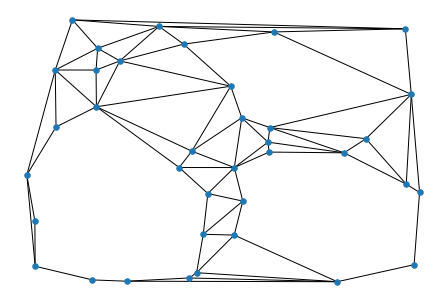

In [46]:
centre_hole_1 = np.array([[0.25,0.25]])
centre_hole_2 = np.array([[0.75,0.75]])
# centre_hole_3 = np.array([[0.25,0.75]])
centre_hole_4 = np.array([[0.75,0.25]])

centre_holes=np.concatenate((centre_hole_1,centre_hole_2,centre_hole_4),axis=0)

radius = 0.2

graph, points = get_delauney_holes_multi(50,centre_holes,radius,points)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

Gsc = SimplicialComplex(graph=graph, no_faces=False)

In [47]:
alpha1 = np.linspace(0,np.pi, 5)
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1

scan_frustration_parameters(
        Gsc,
        filename="Delaunay_three_holes.pkl",
        alpha1=alpha1,
        alpha2=alpha2,
        repeats=n_repeats,
        n_workers=2,
    )

100%|██████████| 25/25 [10:11<00:00, 24.44s/it]


[[  message: 'The solver successfully reached the end of the integration interval.'
       nfev: 661
       njev: 2
        nlu: 51
        sol: None
     status: 0
    success: True
          t: array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
           0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
           0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
           1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
           1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
           2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
           2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
           2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
           3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
           3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
           4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
           4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
           4.8048048 ,   4

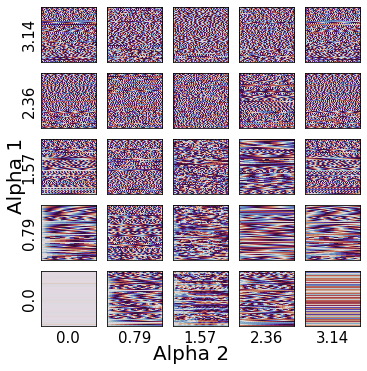

In [48]:
folder = "./results/"

path = folder + "Delaunay_three_holes.pkl"
filename = "Delaunay_three_holes_phases.pdf"
plot_phases(path, filename)

Number of holes: 3
Max number of dimensions: 79


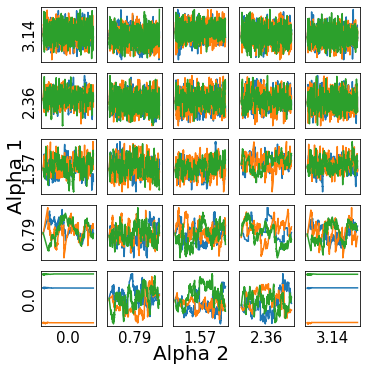

In [49]:
filename = "Delaunay_three_holes_harm.pdf"
plot_harm(path, filename)

Dimension of the gradient space: 36
Max number of dimensions: 79


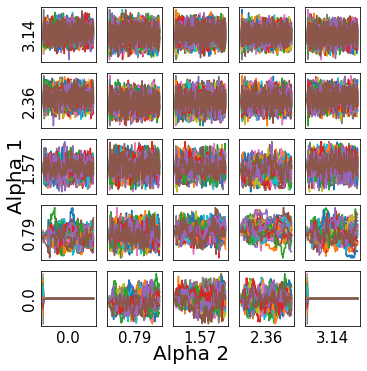

In [50]:
filename = "Delaunay_three_holes_grad.pdf"
plot_grad(path, filename)

Dimension of the curl space: 40
Max number of dimensions: 79


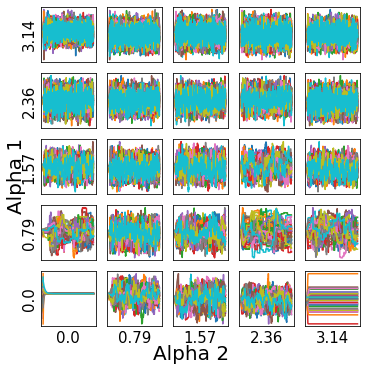

In [52]:
filename = "Delaunay_three_holes_curl.pdf"
plot_curl(path, filename)

## Larger Delaunay

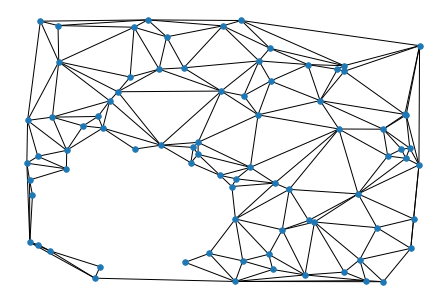

In [53]:
np.random.seed(4444)

centre_hole_1 = np.array([[0.25,0.25]])
# centre_hole_2 = np.array([[0.75,0.75]])

# centre_holes=np.concatenate((centre_hole_1,centre_hole_2),axis=0)

radius = 0.2

graph, points = get_delauney_holes_multi(100,centre_hole_1,radius)
pos = dict(enumerate(points))
nx.draw(graph,pos,node_size=30)

Gsc = SimplicialComplex(graph=graph, no_faces=False)

In [54]:
alpha1 = np.linspace(0,np.pi/2, 5)
alpha2 = np.linspace(0, np.pi, 5)
n_repeats = 1

scan_frustration_parameters(
        Gsc,
        filename="Delaunay_large_one_hole.pkl",
        alpha1=alpha1,
        alpha2=alpha2,
        repeats=n_repeats,
        n_workers=2,
    )

100%|██████████| 25/25 [10:27<00:00, 25.11s/it]


[[  message: 'The solver successfully reached the end of the integration interval.'
       nfev: 803
       njev: 2
        nlu: 58
        sol: None
     status: 0
    success: True
          t: array([  0.        ,   0.1001001 ,   0.2002002 ,   0.3003003 ,
           0.4004004 ,   0.5005005 ,   0.6006006 ,   0.7007007 ,
           0.8008008 ,   0.9009009 ,   1.001001  ,   1.1011011 ,
           1.2012012 ,   1.3013013 ,   1.4014014 ,   1.5015015 ,
           1.6016016 ,   1.7017017 ,   1.8018018 ,   1.9019019 ,
           2.002002  ,   2.1021021 ,   2.2022022 ,   2.3023023 ,
           2.4024024 ,   2.5025025 ,   2.6026026 ,   2.7027027 ,
           2.8028028 ,   2.9029029 ,   3.003003  ,   3.1031031 ,
           3.2032032 ,   3.3033033 ,   3.4034034 ,   3.5035035 ,
           3.6036036 ,   3.7037037 ,   3.8038038 ,   3.9039039 ,
           4.004004  ,   4.1041041 ,   4.2042042 ,   4.3043043 ,
           4.4044044 ,   4.5045045 ,   4.6046046 ,   4.7047047 ,
           4.8048048 ,   4

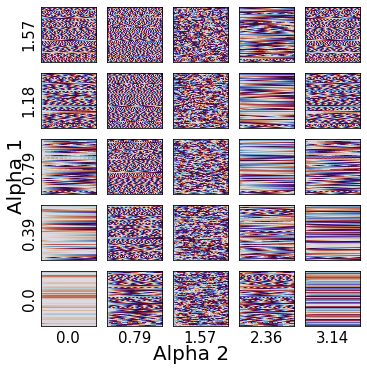

In [55]:
folder = "./results/"

path = folder + "Delaunay_large_one_hole.pkl"
filename = "Delaunay_large_one_hole_phases.pdf"
plot_phases(path, filename)

Number of holes: 1
Max number of dimensions: 212


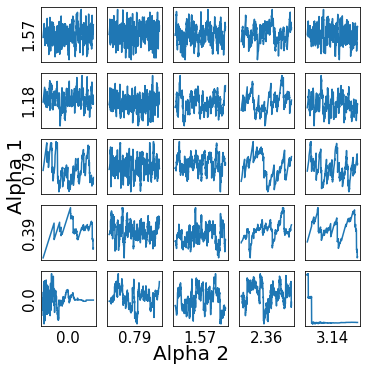

In [56]:
filename = "Delaunay_large_one_hole_harm.pdf"
plot_harm(path, filename)

Dimension of the gradient space: 80
Max number of dimensions: 212


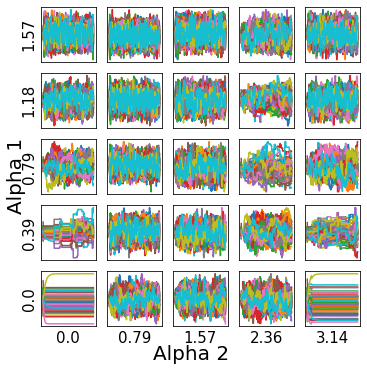

In [57]:
filename = "Delaunay_large_one_hole_grad.pdf"
plot_grad(path, filename)

Dimension of the curl space: 131
Max number of dimensions: 212


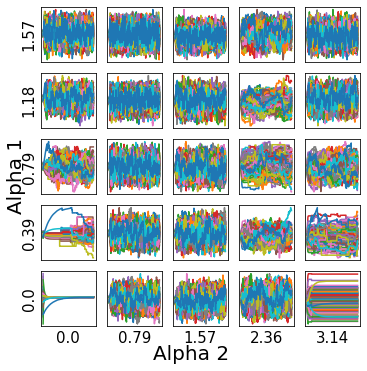

In [58]:
filename = "Delaunay_large_one_hole_curl.pdf"
plot_curl(path, filename)